<a href="https://colab.research.google.com/github/Dkepffl/2022-1-ESAA/blob/main/Session/Session_220627_exercise_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [2]:
sales = pd.read_csv("/content/drive/MyDrive/2022-1 ESAA/DataSet/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [3]:
print(sales.shape) 
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


In [4]:
sales.head()

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6


# 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [5]:
# 모델 생성
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(sales)

KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [6]:
kmeans.fit_transform(sales)
pred = kmeans.labels_

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [7]:
sales['cluster'] = pred

# 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [8]:
salesDF = sales.drop('cluster', axis = 1)

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [9]:
# 차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(salesDF)

# sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_transformed[:,0]
sales['pca_y'] = pca_transformed[:,1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

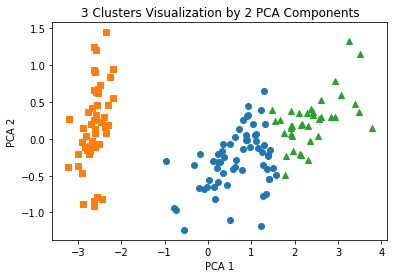

In [10]:
# cluster 값이 0, 1, 2인 경우마다 별도의 Index로 추출
marker0_ind = sales[sales['cluster'] == 0].index
marker1_ind = sales[sales['cluster'] == 1].index
marker2_ind = sales[sales['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출하고, o, s, ^ 로 marker 표시
plt.scatter(x = sales.loc[marker0_ind,'pca_x'], y = sales.loc[marker0_ind,'pca_y'], marker = 'o') 
plt.scatter(x = sales.loc[marker1_ind,'pca_x'], y = sales.loc[marker1_ind,'pca_y'], marker = 's')
plt.scatter(x = sales.loc[marker2_ind,'pca_x'], y = sales.loc[marker2_ind,'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# 4) 군집평가: 실루엣 계수 구하기

In [11]:
# 시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales = sales.drop(['pca_x','pca_y'], axis = 1)

# cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data = sales.drop('cluster', axis = 1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [15]:
# sales의 모든 데이터에 실루엣 계수 구하기
score = silhouette_samples(sales, sales['cluster'])

In [16]:
# sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff'] = score

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [17]:
# 모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales_data, sales['cluster'])

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [18]:
# 군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.610277
1    0.764511
2    0.641158
Name: silhouette_coeff, dtype: float64